### Week1

Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.chdir('C:/Users/lsreeram/Downloads/_/Coursera/09 Machine Learning with Python/Week2')

In [3]:
df =pd.read_csv('FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [4]:
df.shape

(1067, 13)

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


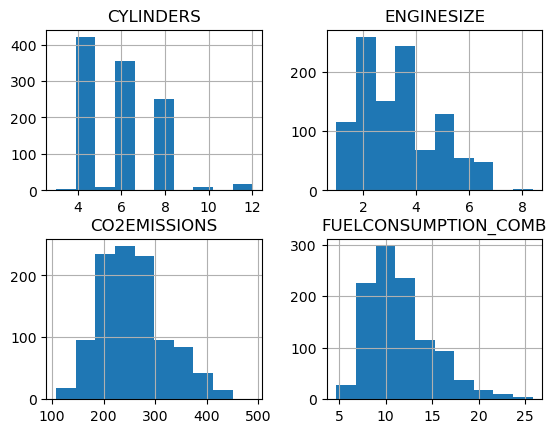

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show();

Data Scaling is needed. fix

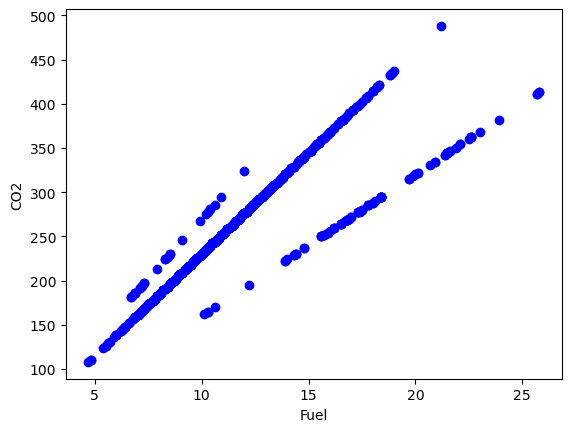

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel('Fuel')
plt.ylabel('CO2')
plt.show();

In [ ]:
sns.lmplot(x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS', data=cdf, hue='CYLINDERS', fit_reg=False)

In [ ]:
sns.lmplot(x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS', data=cdf, hue='ENGINESIZE', fit_reg=False)

In [ ]:
# Unique category labels: 'D', 'F', 'G', ...
color_labels = df['color'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(df['carat'], df['price'], c=df['color'].map(color_map))

In [ ]:
from plotnine import *
from plotnine.data import diamonds

g = ggplot(diamonds, aes(x='carat', y='price', color='color')) + geom_point(stat='summary')
print(g)

In [ ]:
import itertools
from matplotlib import markers

m_styles = markers.MarkerStyle.markers
N = 60
colormap = plt.cm.Dark2.colors  # Qualitative colormap
for i, (marker, color) in zip(range(N), itertools.product(m_styles, colormap)):
    plt.scatter(*np.random.random(2), color=color, marker=marker, label=i)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=4);

If the variable assigned to hue is numeric, the semantic mapping will be quantitative and use a different default palette:
    

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS', data=cdf, style= 'CYLINDERS',hue='ENGINESIZE');

A numeric variable can also be assigned to size to apply a semantic mapping to the areas of the points:

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS', data=cdf, hue='CYLINDERS', size='ENGINESIZE');

If there are a large number of unique numeric values, the legend will show a representative, evenly-spaced set:

In [ ]:
tip_rate = tips.eval("tip / total_bill").rename("tip_rate")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate)

Use relplot() to combine scatterplot() and FacetGrid. This allows grouping within additional categorical variables, and plotting them across multiple subplots.


When the variable assigned to col has many levels, it can be “wrapped” across multiple rows:


Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.

In [ ]:
sns.relplot(
    data=cdf, x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS',
    col="CYLINDERS", hue='ENGINESIZE',    kind="scatter", size='ENGINESIZE' ,col_wrap=2,height=4, aspect=1.2
);

#palette='cool'

In [ ]:
sns.set_theme(style='white')
#Load dataset
#sns_data = sns.load_dataset('cdf')

#PLOT

sns.relplot(data=cdf, x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS',
            size='CYLINDERS',    kind="scatter", hue='ENGINESIZE' ,sizes=(60,400),height=6, alpha=.5
);

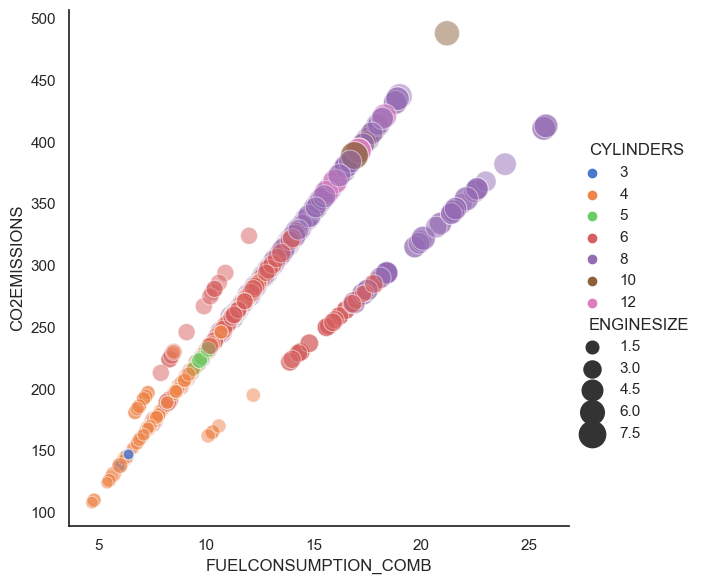

In [9]:
sns.set_theme(style='white')
#Load dataset
#sns_data = sns.load_dataset('cdf')

#PLOT

sns.relplot(data=cdf, x='FUELCONSUMPTION_COMB' , y='CO2EMISSIONS',
            hue='CYLINDERS',    kind="scatter", size='ENGINESIZE' ,sizes=(60,400),height=6, alpha=.5,
           palette='muted');

Stacked Histograms

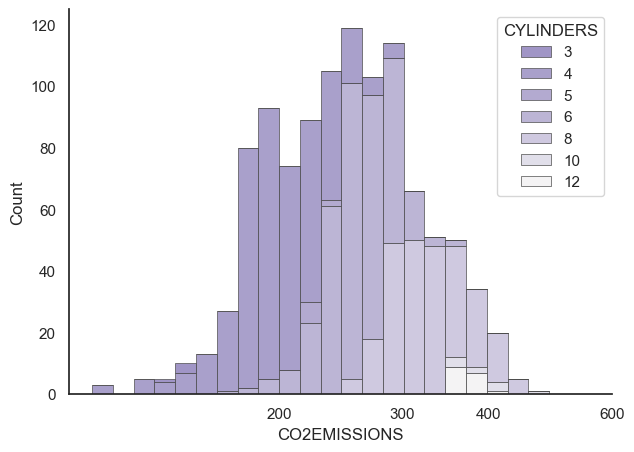

In [10]:
f,ax=plt.subplots(figsize=(7,5))
sns.despine(f)

sns.histplot(
    cdf, x='CO2EMISSIONS',
    hue='CYLINDERS',
    multiple='stack',
    edgecolor='.3',
    linewidth=.5,
    palette='light:m_r',
    log_scale=True)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([200,300,400,600]);

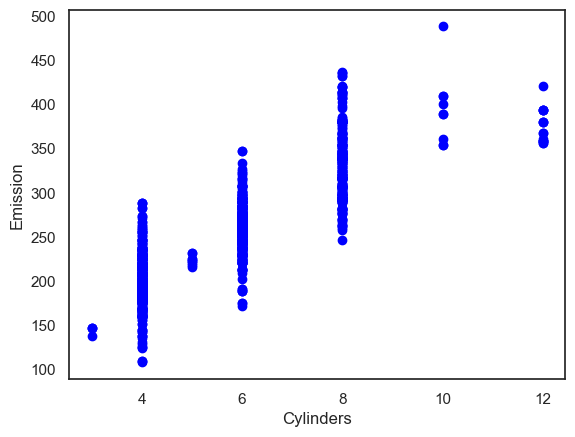

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

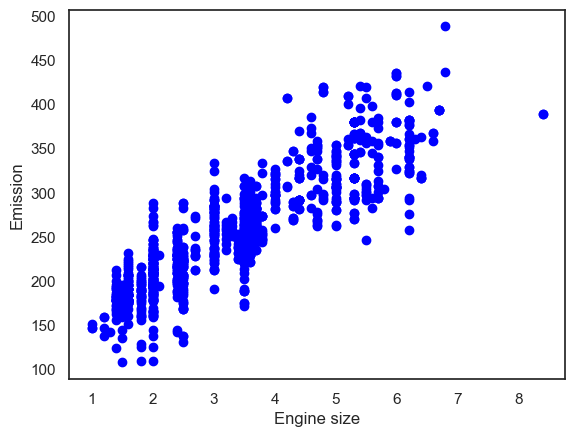

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Train Data Distribution

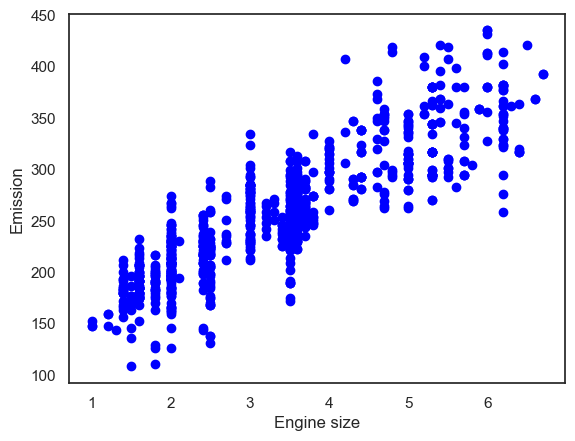

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modeling

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.91034211]]
Intercept:  [125.62385985]


Text(0, 0.5, 'Emission')

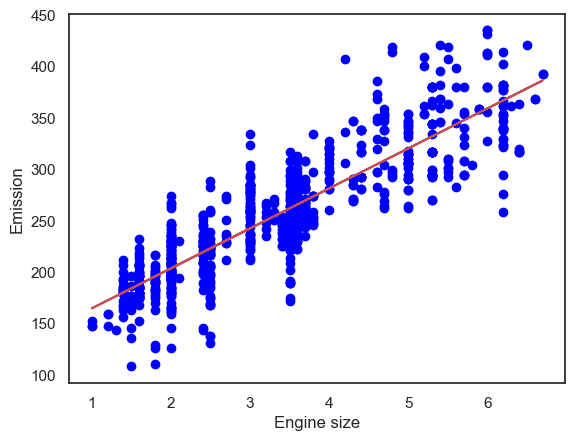

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.75
Residual sum of squares (MSE): 1182.59
R2-score: 0.76
